### Dataset 1: Analyzing Opioid Prescription Rates by State and Provider Type

Implementing K-Means clustering and naive bayes classification to explore provider presecription patterns by state and specialty.

#### Data Cleaning

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [57]:
## load data and examine head of data
import pandas as pd
filename = "prescription_providers.csv"
df = pd.read_csv(filename)
df.head()

,Prscrbr_NPI,Prscrbr_Last_Org_Name,Prscrbr_First_Name,Prscrbr_MI,Prscrbr_Crdntls,Prscrbr_Ent_Cd,Prscrbr_St1,Prscrbr_St2,Prscrbr_City,Prscrbr_State_Abrvtn,...,Bene_Male_Cnt,Bene_Race_Wht_Cnt,Bene_Race_Black_Cnt,Bene_Race_Api_Cnt,Bene_Race_Hspnc_Cnt,Bene_Race_Natind_Cnt,Bene_Race_Othr_Cnt,Bene_Dual_Cnt,Bene_Ndual_Cnt,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,MD,...,51.0,99.0,20.0,21.0,NaN,0.0,NaN,62.0,93.0,2.059633
1,1003000142,Khalil,Rashid,NaN,M.D.,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,OH,...,183.0,277.0,184.0,NaN,26.0,NaN,12.0,289.0,213.0,1.903775
2,1003000167,Escobar,Julio,E,DDS,I,5 Pine Cone Rd,NaN,Dayton,NV,...,25.0,45.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.139187
3,1003000423,Velotta,Jennifer,A,M.D.,I,11100 Euclid Ave,NaN,Cleveland,OH,...,NaN,54.0,NaN,0.0,NaN,0.0,NaN,17.0,47.0,0.880259
4,1003000480,Rothchild,Kevin,B,MD,I,12605 E 16th Ave,NaN,Aurora,CO,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,1.797038


In [58]:
df.shape

(1332309, 84)

In [59]:
print(df.columns)

Index(['Prscrbr_NPI', 'Prscrbr_Last_Org_Name', 'Prscrbr_First_Name',
       'Prscrbr_MI', 'Prscrbr_Crdntls', 'Prscrbr_Ent_Cd', 'Prscrbr_St1',
       'Prscrbr_St2', 'Prscrbr_City', 'Prscrbr_State_Abrvtn',
       'Prscrbr_State_FIPS', 'Prscrbr_zip5', 'Prscrbr_RUCA',
       'Prscrbr_RUCA_Desc', 'Prscrbr_Cntry', 'Prscrbr_Type',
       'Prscrbr_Type_Src', 'Tot_Clms', 'Tot_30day_Fills', 'Tot_Drug_Cst',
       'Tot_Day_Suply', 'Tot_Benes', 'GE65_Sprsn_Flag', 'GE65_Tot_Clms',
       'GE65_Tot_30day_Fills', 'GE65_Tot_Drug_Cst', 'GE65_Tot_Day_Suply',
       'GE65_Bene_Sprsn_Flag', 'GE65_Tot_Benes', 'Brnd_Sprsn_Flag',
       'Brnd_Tot_Clms', 'Brnd_Tot_Drug_Cst', 'Gnrc_Sprsn_Flag',
       'Gnrc_Tot_Clms', 'Gnrc_Tot_Drug_Cst', 'Othr_Sprsn_Flag',
       'Othr_Tot_Clms', 'Othr_Tot_Drug_Cst', 'MAPD_Sprsn_Flag',
       'MAPD_Tot_Clms', 'MAPD_Tot_Drug_Cst', 'PDP_Sprsn_Flag', 'PDP_Tot_Clms',
       'PDP_Tot_Drug_Cst', 'LIS_Sprsn_Flag', 'LIS_Tot_Clms', 'LIS_Drug_Cst',
       'NonLIS_Sprsn_Flag', 'NonLIS_T

In [60]:
df = df[['Prscrbr_Crdntls','Prscrbr_State_FIPS','Prscrbr_RUCA','Prscrbr_Type','Opioid_Tot_Clms', 'Opioid_Tot_Drug_Cst',
        'Opioid_Tot_Suply','Opioid_Prscrbr_Rate','Opioid_LA_Tot_Clms','Opioid_LA_Prscrbr_Rate']]
df.head()

,Prscrbr_Crdntls,Prscrbr_State_FIPS,Prscrbr_RUCA,Prscrbr_Type,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Tot_Suply,Opioid_Prscrbr_Rate,Opioid_LA_Tot_Clms,Opioid_LA_Prscrbr_Rate
0,M.D.,24.0,1.0,Internal Medicine,13.0,33.63,67.0,3.147700,0.0,0.000000
1,M.D.,39.0,1.0,Anesthesiology,773.0,32368.09,21196.0,50.855263,70.0,9.055627
2,DDS,32.0,2.0,Dentist,11.0,65.63,38.0,10.576923,0.0,0.000000
3,M.D.,39.0,1.0,Obstetrics & Gynecology,NaN,NaN,NaN,NaN,NaN,NaN
4,MD,8.0,1.0,General Surgery,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.isna().sum()

Prscrbr_Crdntls           121186
Prscrbr_State_FIPS          2748
Prscrbr_RUCA                2748
Prscrbr_Type                   4
Opioid_Tot_Clms           345073
Opioid_Tot_Drug_Cst       345073
Opioid_Tot_Suply          345073
Opioid_Prscrbr_Rate       345073
Opioid_LA_Tot_Clms        430874
Opioid_LA_Prscrbr_Rate    973903
dtype: int64

In [62]:
# too many NA values
df = df.drop(columns='Opioid_LA_Prscrbr_Rate')

In [63]:
df = df.dropna(subset=['Opioid_Prscrbr_Rate'])

In [64]:
# drop all rows with NA values, dataset is large and this is a small percentage
df = df.dropna()

In [65]:
df.shape

(819213, 9)

In [66]:
df.head(10)


,Prscrbr_Crdntls,Prscrbr_State_FIPS,Prscrbr_RUCA,Prscrbr_Type,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Tot_Suply,Opioid_Prscrbr_Rate,Opioid_LA_Tot_Clms
0,M.D.,24.0,1.0,Internal Medicine,13.0,33.63,67.0,3.147700,0.0
1,M.D.,39.0,1.0,Anesthesiology,773.0,32368.09,21196.0,50.855263,70.0
2,DDS,32.0,2.0,Dentist,11.0,65.63,38.0,10.576923,0.0
5,DO,42.0,1.0,Internal Medicine,53.0,11833.04,1012.0,0.796394,14.0
6,"M.D., PH.D",40.0,1.0,Urology,254.0,1842.13,1345.0,13.375461,0.0
7,MD,6.0,1.0,Cardiac Surgery,0.0,0.00,0.0,0.000000,0.0
9,P.A.,48.0,1.0,Physician Assistant,0.0,0.00,0.0,0.000000,0.0
10,PHC,35.0,2.0,Pharmacist,0.0,0.00,0.0,0.000000,0.0
11,APRN,6.0,1.0,Nurse Practitioner,0.0,0.00,0.0,0.000000,0.0
16,O.D.,48.0,1.0,Optometry,0.0,0.00,0.0,0.000000,0.0


### K-Means Clustering

In [61]:
# for clustering, drop categorical columns
df_clustering = df.drop(columns = ['Prscrbr_Crdntls','Prscrbr_State_FIPS','Prscrbr_RUCA','Prscrbr_Type'])
df_clustering.head()

,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Tot_Suply,Opioid_Prscrbr_Rate,Opioid_LA_Tot_Clms
0,13.0,33.63,67.0,3.147700,0.0
1,773.0,32368.09,21196.0,50.855263,70.0
2,11.0,65.63,38.0,10.576923,0.0
5,53.0,11833.04,1012.0,0.796394,14.0
6,254.0,1842.13,1345.0,13.375461,0.0


In [62]:
# consolidate to 3 features for visualization
df_clustering = df_clustering.drop(columns = ['Opioid_LA_Tot_Clms','Opioid_Tot_Suply'])
df_clustering.head()

,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Prscrbr_Rate
0,13.0,33.63,3.147700
1,773.0,32368.09,50.855263
2,11.0,65.63,10.576923
5,53.0,11833.04,0.796394
6,254.0,1842.13,13.375461


In [63]:
# normalize data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # standardizes to zero mean and unit variance
df_clustering = pd.DataFrame(scaler.fit_transform(df_clustering), columns=df_clustering.columns)
df_clustering.head()

,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Prscrbr_Rate
0,-0.163440,-0.115952,-0.240732
1,2.523028,1.302272,3.089869
2,-0.170510,-0.114548,0.277924
3,-0.022047,0.401583,-0.404883
4,0.688453,-0.036629,0.473298


In [64]:
# filter out outliers outside of IQR
Q1 = df_clustering.quantile(0.25)
Q3 = df_clustering.quantile(0.75)
IQR = Q3 - Q1
df_clustering = df_clustering[~((df_clustering < (Q1 - 1.5 * IQR)) | (df_clustering > (Q3 + 1.5 * IQR))).any(axis=1)]


In [65]:
df_clustering = df_clustering.sample(frac=0.1, random_state=42)

In [66]:
import matplotlib.pyplot as plt

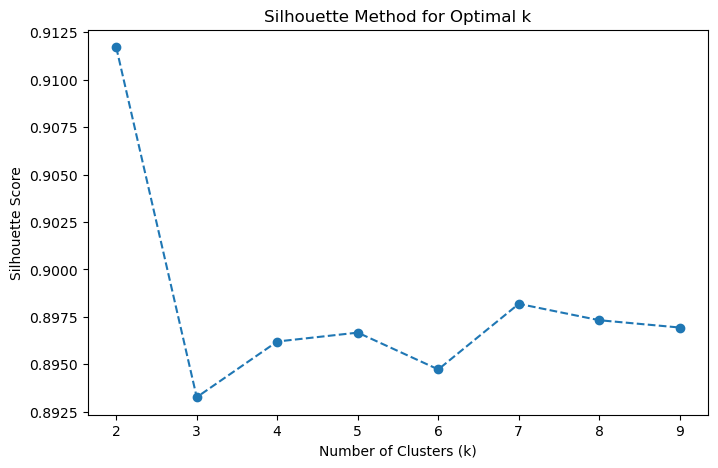

In [67]:
# calculate silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 10)  # k from 2 to 9

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_clustering)
    silhouette_scores.append(silhouette_score(df_clustering, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.show()

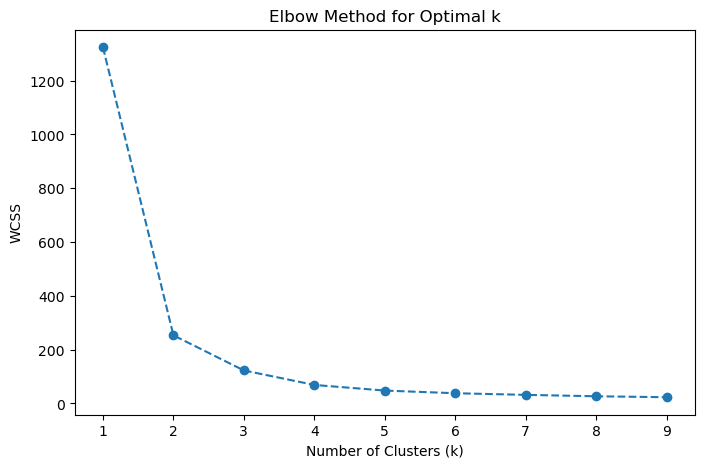

In [68]:
inertias = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_clustering)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

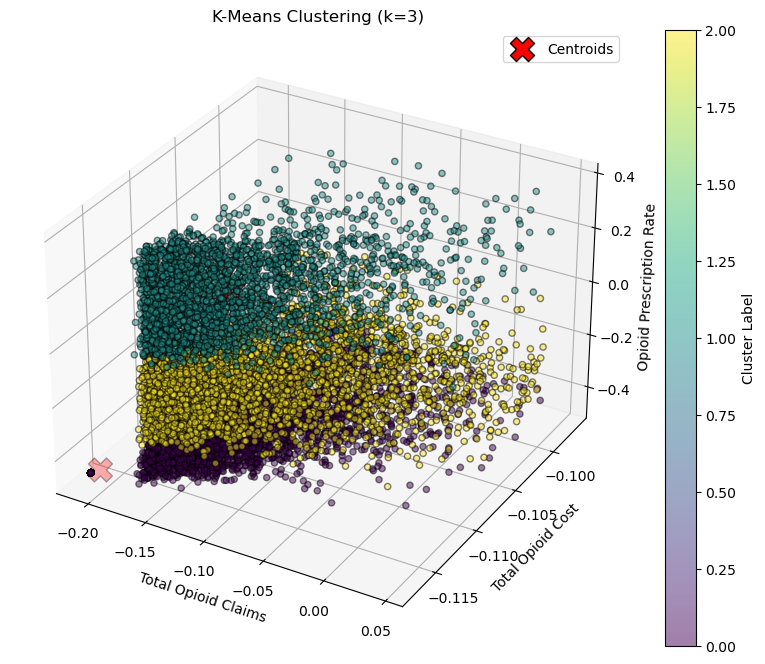

In [70]:
# fit k means on scaled 3d data
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_clustering)

# Get cluster centers
centroids = kmeans.cluster_centers_

 # Extract the 3 columns for visualization
x, y, z = df_clustering.iloc[:, 0], df_clustering.iloc[:, 1], df_clustering.iloc[:, 2]

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')

# Plot data points
scatter = ax.scatter(x, y, z, c=labels, cmap="viridis", edgecolor='k', s=20, alpha=0.5)

# Plot centroids (black X markers)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
               c='red', s=300, marker='X', edgecolors='black', label='Centroids')

    # Labels and Title
ax.set_xlabel('Total Opioid Claims')
ax.set_ylabel('Total Opioid Cost')
ax.set_zlabel('Opioid Prescription Rate')
ax.set_title(f'K-Means Clustering (k=3)')

# Show color bar for cluster labels
plt.colorbar(scatter, label="Cluster Label")

# Show the plot
plt.legend()
plt.show()

In [71]:
df_clustering.shape

(58487, 3)

#### Decision Tree

In [105]:
df['Prscrbr_Crdntls'].value_counts()


Prscrbr_Crdntls
MD                   206905
M.D.                 174655
PA-C                  42362
DDS                   28597
DO                    27112
                      ...  
APNP, DNP                 1
MD; MSN                   1
AGACNP (DNP)              1
FNP-C; PMHNP- BC          1
D.D.S., MPA, MAED         1
Name: count, Length: 13881, dtype: int64

In [106]:
type_counts = df['Prscrbr_Crdntls'].value_counts()
print(type_counts.to_string()) 

Prscrbr_Crdntls
MD                      206905
M.D.                    174655
PA-C                     42362
DDS                      28597
DO                       27112
D.O.                     24560
NP                       24034
O.D.                     17458
PA                       16296
FNP                      16066
APRN                     15203
D.D.S.                   15089
DMD                      14846
OD                       11643
FNP-C                     9150
ARNP                      8659
PHARMD                    8262
CRNP                      7265
DPM                       6983
M.D                       6934
D.M.D.                    6382
NP-C                      5908
FNP-BC                    5190
CNP                       4279
RPH                       3914
P.A.                      3626
APN                       3205
N.P.                      2681
PMHNP                     2458
D.P.M.                    2373
PAC                       2344
D.D.S                  

In [107]:
#drop data with specialties of less than 50 data points

credential_counts = df['Prscrbr_Crdntls'].value_counts()

# filter for specialties with 50 or more data points
valid_specialties = credential_counts[credential_counts >= 99].index

# keep only rows with valid specialties
df_dt = df[df['Prscrbr_Crdntls'].isin(valid_specialties)]


In [108]:
type_counts = df_dt['Prscrbr_Crdntls'].value_counts()
print(type_counts.to_string()) 

Prscrbr_Crdntls
MD                     206905
M.D.                   174655
PA-C                    42362
DDS                     28597
DO                      27112
D.O.                    24560
NP                      24034
O.D.                    17458
PA                      16296
FNP                     16066
APRN                    15203
D.D.S.                  15089
DMD                     14846
OD                      11643
FNP-C                    9150
ARNP                     8659
PHARMD                   8262
CRNP                     7265
DPM                      6983
M.D                      6934
D.M.D.                   6382
NP-C                     5908
FNP-BC                   5190
CNP                      4279
RPH                      3914
P.A.                     3626
APN                      3205
N.P.                     2681
PMHNP                    2458
D.P.M.                   2373
PAC                      2344
D.D.S                    2313
PMHNP-BC                

In [109]:
# a lot of variation in format of reporting
#need to remap for consistency
# dictionary to map raw credentials to standardized labels
credential_mapping = {
    # MD
    'MD': 'MD', 'M.D.': 'MD', 'M.D': 'MD', 'M. D.': 'MD', 'MD, PHD': 'MD', 'MD PHD': 'MD',
    'MD, MPH': 'MD', 'M.D., PH.D.': 'MD', 'M.D., M.P.H.': 'MD', 'MD, MS': 'MD',
    'M.D.,': 'MD', 'M.D., PHD': 'MD', 'M.D., MPH': 'MD', 'MD.': 'MD', 'M.D,': 'MD',
    'M.D., M.S.': 'MD', 'MD MPH': 'MD', 'MD/PHD': 'MD',

    # DO
    'DO': 'DO', 'D.O.': 'DO', 'D.O': 'DO', 'DO, MPH': 'DO',

    # PA
    'PA-C': 'PA-C', 'PA': 'PA-C', 'P.A.': 'PA-C', 'PAC': 'PA-C', 'P.A': 'PA-C',
    'P.A.-C': 'PA-C', 'P.A.-C.': 'PA-C', 'PA C': 'PA-C', 'P.A-C': 'PA-C',
    'RPAC': 'PA-C', 'MPAS, PA-C': 'PA-C', 'PA-C, MPAS': 'PA-C', 'PA-C, ATC': 'PA-C',
    'MMS, PA-C': 'PA-C', 'MS, PA-C': 'PA-C', 'PHYSICIAN ASSISTANT': 'PA-C',

    # NP 
    'NP': 'NP', 'N.P.': 'NP', 'NP-C': 'NP', 'N.P': 'NP', 'NP-BC': 'NP',
    'NURSE PRACTITIONER': 'NP', 'RN, NP': 'NP', 'APRN, NP-C': 'NP', 'MSN, NP-C': 'NP',

    # FNP
    'FNP': 'FNP', 'FNP-C': 'FNP', 'FNP-BC': 'FNP', 'F.N.P.': 'FNP', 'CFNP': 'FNP',
    'FNPC': 'FNP', 'RN, FNP': 'FNP', 'RN, FNP-C': 'FNP', 'MSN, FNP-C': 'FNP',
    'MSN, FNP-BC': 'FNP', 'MSN, FNP': 'FNP',

    # APRN
    'APRN': 'APRN', 'APN': 'APRN', 'APRN, FNP-C': 'APRN', 'APRN-CNP': 'APRN',
    'APNP': 'APRN', 'APRN, CNP': 'APRN', 'APRN, FNP-BC': 'APRN', 'APRN, PMHNP-BC': 'APRN',
    'APRN-BC': 'APRN', 'APRN-C': 'APRN', 'APRN FNP-C': 'APRN', 'A.P.R.N.': 'APRN',
    'APRN, BC': 'APRN', 'APRN, FNP': 'APRN', 'APRN-NP': 'APRN',

    # CRNP
    'CRNP': 'CRNP', 'C.R.N.P.': 'CRNP', 'CRNP-PMH': 'CRNP',

    # ANP
    'ANP': 'ANP', 'ANP-BC': 'ANP', 'ANP-C': 'ANP',

    # PMHNP
    'PMHNP': 'PMHNP', 'PMHNP-BC': 'PMHNP', 'DNP, PMHNP-BC': 'PMHNP',

    # AGNP
    'AGNP': 'AGNP', 'AGPCNP': 'AGNP', 'AGACNP-BC': 'AGNP', 'AGNP-C': 'AGNP',
    'AGPCNP-BC': 'AGNP', 'AGACNP': 'AGNP', 'ACNPC-AG': 'AGNP',

    # CNP
    'CNP': 'CNP', 'C.N.P.': 'CNP', 'RN, CNP': 'CNP',

    # CNM
    'CNM': 'CNM', 'C.N.M.': 'CNM',

    # WHNP
    'WHNP': 'WHNP', 'WHNP-BC': 'WHNP',

    # CRNA
    'CRNA': 'CRNA',

    # DNP
    'DNP': 'DNP', 'DNP, FNP-C': 'DNP', 'DNP, FNP-BC': 'DNP', 'DNP, APRN, FNP-C': 'DNP',
    'DNP, APRN, FNP-BC': 'DNP', 'DNP, APRN': 'DNP', 'DNP, APRN, PMHNP-BC': 'DNP',

    # DDS
    'DDS': 'DDS', 'D.D.S.': 'DDS', 'D.D.S': 'DDS', 'DDS, MS': 'DDS', 'DDS MS': 'DDS',
    'DDS, MD': 'DDS', 'D.D.S., M.S.': 'DDS', 'D.D.S., M.D.': 'DDS',

    # DMD
    'DMD': 'DMD', 'D.M.D.': 'DMD', 'D.M.D': 'DMD', 'DMD, MD': 'DMD', 'DMD, MS': 'DMD',

    # OD
    'OD': 'OD', 'O.D.': 'OD', 'O.D': 'OD', 'O. D.': 'OD',

    # DPM
    'DPM': 'DPM', 'D.P.M.': 'DPM', 'D.P.M': 'DPM',

    # PharmD
    'PHARMD': 'PharmD', 'PHARM.D.': 'PharmD', 'PHARM.D': 'PharmD', 'PHARM D': 'PharmD',
    'PHARM. D.': 'PharmD', 'PHARM D.': 'PharmD', 'PHARM. D': 'PharmD', 'PHARMD.': 'PharmD',
    'PHARMD, RPH': 'PharmD', 'PHARMACIST': 'PharmD',

    # RPH
    'RPH': 'RPh', 'R.PH.': 'RPh', 'R.PH': 'RPh',

    # RN
    'RN': 'RN',

    # PHD
    'PHD': 'PhD', 'M.D., PH.D': 'PhD',

    # MBBS
    'MBBS': 'MBBS', 'M.B.B.S.': 'MBBS', 'M.B.B.S': 'MBBS',

    # ND
    'ND': 'ND', 'N.D.': 'ND', 'NMD': 'ND',
}



In [110]:
df_dt['Prscrbr_Crdntls_Cleaned'] = df_dt['Prscrbr_Crdntls'].map(credential_mapping).fillna(df_dt['Prscrbr_Crdntls'])


/var/folders/xp/jfl5n1qn405fcy_ccvcwy6mc0000gn/T/ipykernel_95365/3664401385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dt['Prscrbr_Crdntls_Cleaned'] = df_dt['Prscrbr_Crdntls'].map(credential_mapping).fillna(df_dt['Prscrbr_Crdntls'])


In [111]:
type_counts = df_dt['Prscrbr_Crdntls_Cleaned'].value_counts()
print(type_counts.to_string()) 

Prscrbr_Crdntls_Cleaned
MD                     396986
PA-C                    68699
DO                      53353
DDS                     47254
NP                      35238
FNP                     32678
OD                      29726
APRN                    23698
DMD                     23129
PharmD                  13695
DPM                      9683
ARNP                     8659
CRNP                     7561
PMHNP                    4819
CNP                      4567
RPh                      4464
DNP                      2445
AGNP                     2402
CNM                      1695
ANP                      1632
MBBS                     1330
ND                       1146
RPA-C                     880
RN                        816
WHNP                      800
MSN, APRN, FNP-C          651
ACNP                      589
CNS                       293
ACNP-BC                   261
A.R.N.P.                  251
MD, MBA                   249
MSN, APRN, FNP-BC         235
PhD             

In [112]:
# reduce dataset to providers with at least 7500 data points

providers_to_keep = [
    'MD', 'PA-C', 'DO', 'DDS', 'NP', 'FNP',
    'OD', 'APRN', 'DMD', 'PharmD', 'DPM',
    'ARNP', 'CRNP'
]

df_dt = df_dt[df_dt['Prscrbr_Crdntls_Cleaned'].isin(providers_to_keep)]

In [113]:
# balance data, using both under and oversampling so that each provider type has 20,000 data points
from sklearn.utils import resample

balanced = []
for provider in providers_to_keep:
    subset = df_dt[df_dt['Prscrbr_Crdntls_Cleaned'] == provider]
    if len(subset) > 20000:
        # undersample
        sampled = resample(subset,
                           replace=False,
                           n_samples=20000,
                           random_state=42)
    else:
        # oversample
        sampled = resample(subset,
                           replace=True,
                           n_samples=20000,
                           random_state=42)
    balanced.append(sampled)

# combine into one balanced dataset
df_dt_2 = pd.concat(balanced)


In [114]:
# check work
type_counts = df_dt_2['Prscrbr_Crdntls_Cleaned'].value_counts()
print(type_counts)

Prscrbr_Crdntls_Cleaned
MD        20000
PA-C      20000
DO        20000
DDS       20000
NP        20000
FNP       20000
OD        20000
APRN      20000
DMD       20000
PharmD    20000
DPM       20000
ARNP      20000
CRNP      20000
Name: count, dtype: int64


In [115]:
df_dt_2.head()

,Prscrbr_Crdntls,Prscrbr_State_FIPS,Prscrbr_RUCA,Prscrbr_Type,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Tot_Suply,Opioid_Prscrbr_Rate,Opioid_LA_Tot_Clms,Prscrbr_Crdntls_Cleaned
580498,MD,24.0,1.0,Internal Medicine,0.0,0.00,0.0,0.000000,0.0,MD
1327788,MD,50.0,4.0,Orthopedic Surgery,79.0,347.45,359.0,40.932642,0.0,MD
1234561,M.D.,27.0,7.0,Obstetrics & Gynecology,0.0,0.00,0.0,0.000000,0.0,MD
593493,"M.D., M.P.H.",39.0,1.0,Allergy/ Immunology,0.0,0.00,0.0,0.000000,0.0,MD
1004531,M.D.,17.0,1.0,Specialist,18.0,1324.08,395.0,40.909091,0.0,MD


In [116]:
df_dt_2=df_dt_2.drop(columns= 'Prscrbr_Crdntls', axis = 1)

In [117]:
df_dt_2.head()

,Prscrbr_State_FIPS,Prscrbr_RUCA,Prscrbr_Type,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Tot_Suply,Opioid_Prscrbr_Rate,Opioid_LA_Tot_Clms,Prscrbr_Crdntls_Cleaned
580498,24.0,1.0,Internal Medicine,0.0,0.00,0.0,0.000000,0.0,MD
1327788,50.0,4.0,Orthopedic Surgery,79.0,347.45,359.0,40.932642,0.0,MD
1234561,27.0,7.0,Obstetrics & Gynecology,0.0,0.00,0.0,0.000000,0.0,MD
593493,39.0,1.0,Allergy/ Immunology,0.0,0.00,0.0,0.000000,0.0,MD
1004531,17.0,1.0,Specialist,18.0,1324.08,395.0,40.909091,0.0,MD


In [118]:
specialty_counts = df_dt_2['Prscrbr_Type'].value_counts()
print(specialty_counts.to_string()) 

df_dt_2.drop(columns = 'Prscrbr_Type', axis = 1)

Prscrbr_Type
Nurse Practitioner                                                98539
Dentist                                                           36725
Optometry                                                         19989
Physician Assistant                                               19888
Pharmacist                                                        19878
Podiatry                                                          19729
Family Practice                                                    8865
Internal Medicine                                                  5639
Student in an Organized Health Care Education/Training Program     3676
Emergency Medicine                                                 3597
Oral Surgery (Dentist only)                                        2257
Psychiatry                                                         1541
Obstetrics & Gynecology                                            1422
Orthopedic Surgery                                 

,Prscrbr_State_FIPS,Prscrbr_RUCA,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Tot_Suply,Opioid_Prscrbr_Rate,Opioid_LA_Tot_Clms,Prscrbr_Crdntls_Cleaned
580498,24.0,1.0,0.0,0.00,0.0,0.000000,0.0,MD
1327788,50.0,4.0,79.0,347.45,359.0,40.932642,0.0,MD
1234561,27.0,7.0,0.0,0.00,0.0,0.000000,0.0,MD
593493,39.0,1.0,0.0,0.00,0.0,0.000000,0.0,MD
1004531,17.0,1.0,18.0,1324.08,395.0,40.909091,0.0,MD
...,...,...,...,...,...,...,...,...
808146,42.0,1.0,0.0,0.00,0.0,0.000000,0.0,CRNP
224446,42.0,1.0,0.0,0.00,0.0,0.000000,0.0,CRNP
316332,24.0,1.0,853.0,34450.08,14207.0,78.042086,195.0,CRNP
388871,42.0,1.0,0.0,0.00,0.0,0.000000,0.0,CRNP


In [119]:

# filter for specialties with 50 or more data points
valid_specs = specialty_counts[specialty_counts >= 99].index

# keep only rows with valid specialties
df_dt_2 = df_dt_2[df_dt_2['Prscrbr_Type'].isin(valid_specs)]


In [120]:
# create training and testing data, remove and save label
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [121]:
#encode categorical variables
from sklearn.preprocessing import LabelEncoder

# initialize encoders
le_type = LabelEncoder()
le_cred = LabelEncoder()

# fit and transform the columns
df_dt_2['Prscrbr_Type_Encoded'] = le_type.fit_transform(df_dt_2['Prscrbr_Type'])
df_dt_2['Prscrbr_Crdntls_Encoded'] = le_cred.fit_transform(df_dt_2['Prscrbr_Crdntls_Cleaned'])

type_mapping = dict(zip(le_cred.transform(le_cred.classes_), le_cred.classes_))
print("Prscrbr_Type Mapping:")
print(type_mapping)

#drop categorical columns
df_dt_2 = df_dt_2.drop(['Prscrbr_Type', 'Prscrbr_Crdntls_Cleaned'], axis=1)



Prscrbr_Type Mapping:
{0: 'APRN', 1: 'ARNP', 2: 'CRNP', 3: 'DDS', 4: 'DMD', 5: 'DO', 6: 'DPM', 7: 'FNP', 8: 'MD', 9: 'NP', 10: 'OD', 11: 'PA-C', 12: 'PharmD'}


In [84]:
df_dt_2.head(10)

,Prscrbr_State_FIPS,Prscrbr_RUCA,Opioid_Tot_Clms,Opioid_Tot_Drug_Cst,Opioid_Tot_Suply,Opioid_Prscrbr_Rate,Opioid_LA_Tot_Clms,Prscrbr_Type_Encoded,Prscrbr_Crdntls_Encoded
580498,24.0,1.0,0.0,0.00,0.0,0.000000,0.0,49,8
1327788,50.0,4.0,79.0,347.45,359.0,40.932642,0.0,76,8
1234561,27.0,7.0,0.0,0.00,0.0,0.000000,0.0,69,8
593493,39.0,1.0,0.0,0.00,0.0,0.000000,0.0,3,8
1004531,17.0,1.0,18.0,1324.08,395.0,40.909091,0.0,111,8
1176766,13.0,1.0,14.0,63.65,170.0,2.898551,0.0,49,8
1249108,12.0,1.0,0.0,0.00,0.0,0.000000,0.0,98,8
1107861,51.0,1.0,0.0,0.00,0.0,0.000000,0.0,99,8
599936,26.0,1.0,0.0,0.00,0.0,0.000000,0.0,114,8
1189293,20.0,4.0,31.0,146.94,92.0,51.666667,0.0,35,8


In [85]:
training, testing = train_test_split(df_dt_2, test_size=.3)
##  Save the Labels and then remove them from the Training and Testing data
training_label = training["Prscrbr_Crdntls_Encoded"]
training=training.drop(["Prscrbr_Crdntls_Encoded"], axis=1)
testing_label = testing["Prscrbr_Crdntls_Encoded"]
testing=testing.drop(["Prscrbr_Crdntls_Encoded"], axis=1)

In [89]:
# initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42,max_depth=15,min_samples_split=10)
clf.fit(training, training_label)  # Training the model with training data

# Step 3: Make predictions on the test set
prediction = clf.predict(testing)  # Predict labels for the test data

# Step 4: Evaluate the model
accuracy = accuracy_score(testing_label, prediction)
print(f"Accuracy: {accuracy:.2f}")

# Print additional evaluation metrics
print("\nClassification Report:")
print(classification_report(testing_label, prediction))

dt_cf = confusion_matrix(testing_label, prediction)
print("\nConfusion Matrix:")
print(confusion_matrix(testing_label, prediction))

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.56      0.57      5859
           1       0.76      0.79      0.78      5959
           2       0.91      0.91      0.91      5940
           3       0.70      0.79      0.74      6132
           4       0.76      0.64      0.69      5986
           5       0.60      0.65      0.63      6036
           6       1.00      0.99      0.99      5968
           7       0.48      0.51      0.50      6059
           8       0.63      0.61      0.62      5962
           9       0.53      0.47      0.50      5984
          10       1.00      1.00      1.00      6059
          11       1.00      0.99      1.00      6015
          12       1.00      1.00      1.00      6041

    accuracy                           0.76     78000
   macro avg       0.76      0.76      0.76     78000
weighted avg       0.76      0.76      0.76     78000


Confusion Matrix:
[[3267 1031   38    0

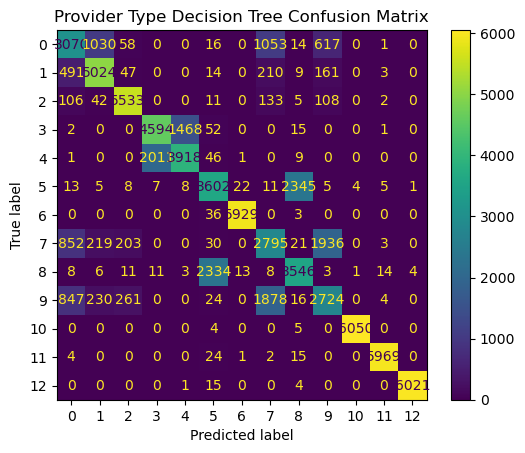

In [87]:
## Create and display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cf,display_labels=clf.classes_)
disp.plot()
plt.title("Provider Type Decision Tree Confusion Matrix")
plt.show()